In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

sns.set(style="dark")

%matplotlib inline

In [2]:
lookup_properties = pd.read_csv("/home/apollo/Desktop/SolarWeather/lookup_properties.csv", delimiter=';')

In [3]:
ranking = pd.read_csv('/home/apollo/Desktop/SolarWeather/rankings.csv', delimiter=';')

In [4]:
lookup_properties.head()

,#id,filename,zooniverse_id,area,areafrac,areathesh,arid,bipolesep,bmax,c1flr12hr,...,posstatus,pslcurvature,psllength,pxpos_x,pxpos_y,pxscl_hpc2stg,rvalue,sszn,sszstatus,wlsg
0,1,5397a56aa57caf04c6000001.jpg,ASZ0004sgf,8797.8,0.7174,NaN,1,30.2691,1638.00,0,...,7,0.0,24.1723,203.71601,480.74146,0.0,8879.9,1,1,9006.000
1,2,5397a56ba57caf04c6000003.jpg,ASZ0004sge,1071.0,-0.0696,NaN,1,14.9390,828.11,0,...,7,0.0,0.9591,384.94369,646.17244,0.0,1095.0,2,1,219.130
2,3,5397a56ba57caf04c6000005.jpg,ASZ0004sgd,1492.5,-0.0391,NaN,1,17.4627,1016.30,0,...,7,0.0,0.0000,393.85443,647.23820,0.0,1544.0,3,1,50.035
3,4,5397a56ba57caf04c6000007.jpg,ASZ0004sgc,1192.9,0.2713,NaN,1,33.6636,616.73,0,...,7,0.0,0.0000,436.38598,646.59715,0.0,1279.0,4,1,0.000
4,5,5397a56ba57caf04c6000009.jpg,ASZ0004sgb,3593.6,-0.0104,NaN,1,26.3084,1131.70,0,...,7,0.0,3.8100,440.64068,646.23247,0.0,3788.0,5,1,2380.300


In [5]:
ranking.head()

,#id,image_id,count,k_value,score,std_dev
0,1,36136,50,8,923.812415,2.612478
1,2,37104,50,8,943.778154,2.289780
2,3,189853,50,8,943.936408,2.076371
3,4,82230,50,8,944.762717,2.423050
4,5,9170,50,8,945.611183,2.091108


In [6]:
lookup_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210692 entries, 0 to 210691
Data columns (total 36 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   #id            210692 non-null  int64  
 1   filename       210692 non-null  object 
 2   zooniverse_id  210692 non-null  object 
 3   area           210692 non-null  float64
 4   areafrac       210692 non-null  float64
 5   areathesh      0 non-null       float64
 6   arid           210692 non-null  int64  
 7   bipolesep      210692 non-null  float64
 8   bmax           210692 non-null  float64
 9   c1flr12hr      210692 non-null  int64  
 10  c1flr24hr      210692 non-null  int64  
 11  c5flr12hr      210692 non-null  int64  
 12  c5flr24hr      210692 non-null  int64  
 13  deg2dc         210692 non-null  float64
 14  detstatus      210692 non-null  int64  
 15  id_filename    210692 non-null  int64  
 16  flux           210692 non-null  float64
 17  fluxfrac       210692 non-nul

In [7]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210692 entries, 0 to 210691
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   #id       210692 non-null  int64  
 1   image_id  210692 non-null  int64  
 2   count     210692 non-null  int64  
 3   k_value   210692 non-null  int64  
 4   score     210692 non-null  float64
 5   std_dev   210692 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 9.6 MB


In [8]:
# Removing Non mumerical columns or Null columns
# TODO add tests to see if the shape of the dataset is correct
non_floats = []
for col in lookup_properties:
    if not pd.api.types.is_numeric_dtype(lookup_properties[col]):
        non_floats.append(col)
df = lookup_properties.drop(columns=non_floats)
df = df.dropna(axis=1)

In [9]:
# Getting X and Y dfs
y_columns = ['c1flr12hr', 'c1flr24hr', 'c5flr12hr', 'c5flr24hr',
             'm1flr12hr', 'm1flr24hr', 'm5flr12hr', 'm5flr24hr']
x_columns = [col for col in df.columns if col not in y_columns]
labels = df[y_columns]
data = df[x_columns]

# Adding complexity scores

labels['complexity'] = ranking.score
data['complexity'] = ranking.score

/home/apollo/anaconda3/envs/Andromeda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/apollo/anaconda3/envs/Andromeda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
labels

,c1flr12hr,c1flr24hr,c5flr12hr,c5flr24hr,m1flr12hr,m1flr24hr,m5flr12hr,m5flr24hr,complexity
0,0,0,0,0,0,0,0,0,923.812415
1,0,0,0,0,0,0,0,0,943.778154
2,0,0,0,0,0,0,0,0,943.936408
3,0,0,0,0,0,0,0,0,944.762717
4,0,0,0,0,0,0,0,0,945.611183
...,...,...,...,...,...,...,...,...,...
210687,1,1,0,1,1,1,0,0,1461.920494
210688,0,1,1,1,0,0,0,0,1462.192818
210689,0,0,1,1,0,0,0,0,1466.049496
210690,0,0,1,1,0,0,0,0,1466.287215


In [11]:
data

,#id,area,areafrac,arid,bipolesep,bmax,deg2dc,detstatus,id_filename,flux,...,pslcurvature,psllength,pxpos_x,pxpos_y,pxscl_hpc2stg,rvalue,sszn,sszstatus,wlsg,complexity
0,1,8797.8,0.7174,1,30.2691,1638.00,40.0263,7,1,1.020500e+22,...,0.0,24.1723,203.71601,480.74146,0.0,8879.9,1,1,9006.000,923.812415
1,2,1071.0,-0.0696,1,14.9390,828.11,19.7457,7,2,1.040600e+21,...,0.0,0.9591,384.94369,646.17244,0.0,1095.0,2,1,219.130,943.778154
2,3,1492.5,-0.0391,1,17.4627,1016.30,18.9848,7,3,1.438300e+21,...,0.0,0.0000,393.85443,647.23820,0.0,1544.0,3,1,50.035,943.936408
3,4,1192.9,0.2713,1,33.6636,616.73,15.3763,7,4,9.995400e+20,...,0.0,0.0000,436.38598,646.59715,0.0,1279.0,4,1,0.000,944.762717
4,5,3593.6,-0.0104,1,26.3084,1131.70,15.0428,7,5,2.932200e+21,...,0.0,3.8100,440.64068,646.23247,0.0,3788.0,5,1,2380.300,945.611183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210687,210688,21181.0,-0.3380,3,16.6472,2157.90,64.1634,7,56237,2.940700e+22,...,0.0,232.4217,925.01542,620.49307,0.0,146310.0,210688,6,188400.000,1461.920494
210688,210689,21531.0,-0.2784,2,15.9505,2049.10,65.0084,7,56238,2.977400e+22,...,0.0,240.9251,928.29308,620.96871,0.0,144910.0,210689,6,197660.000,1462.192818
210689,210690,2742.4,-0.1017,2,50.2381,1020.50,28.7982,7,56239,2.070600e+21,...,0.0,0.0000,712.97221,579.14238,0.0,2610.0,210690,6,0.000,1466.049496
210690,210691,3034.3,-0.2096,2,46.7039,1097.50,29.6919,7,56240,2.291500e+21,...,0.0,2.0036,720.30907,580.00040,0.0,2880.0,210691,6,2001.900,1466.287215


***

# Label EDA

In [198]:
labels_count = pd.DataFrame(data=0, columns=['type', '0', '1'], index=y_columns)
labels_count['type'] = y_columns
labels_count['0'] = labels.shape[0] - labels.sum()
labels_count['1'] = labels.sum()

In [199]:
labels_count

,type,0,1
c1flr12hr,c1flr12hr,186737.0,23955.0
c1flr24hr,c1flr24hr,180357.0,30335.0
c5flr12hr,c5flr12hr,193586.0,17106.0
c5flr24hr,c5flr24hr,191787.0,18905.0
m1flr12hr,m1flr12hr,195482.0,15210.0
m1flr24hr,m1flr24hr,194781.0,15911.0
m5flr12hr,m5flr12hr,194756.0,15936.0
m5flr24hr,m5flr24hr,194546.0,16146.0


In [200]:
tidy = labels_count.melt(id_vars='type')
tidy.columns = ['Flare Class', 'Key', 'Occurence Count']

In [201]:
tidy

,Flare Class,Key,Occurence Count
0,c1flr12hr,0,186737.0
1,c1flr24hr,0,180357.0
2,c5flr12hr,0,193586.0
3,c5flr24hr,0,191787.0
4,m1flr12hr,0,195482.0
5,m1flr24hr,0,194781.0
6,m5flr12hr,0,194756.0
7,m5flr24hr,0,194546.0
8,c1flr12hr,1,23955.0
9,c1flr24hr,1,30335.0


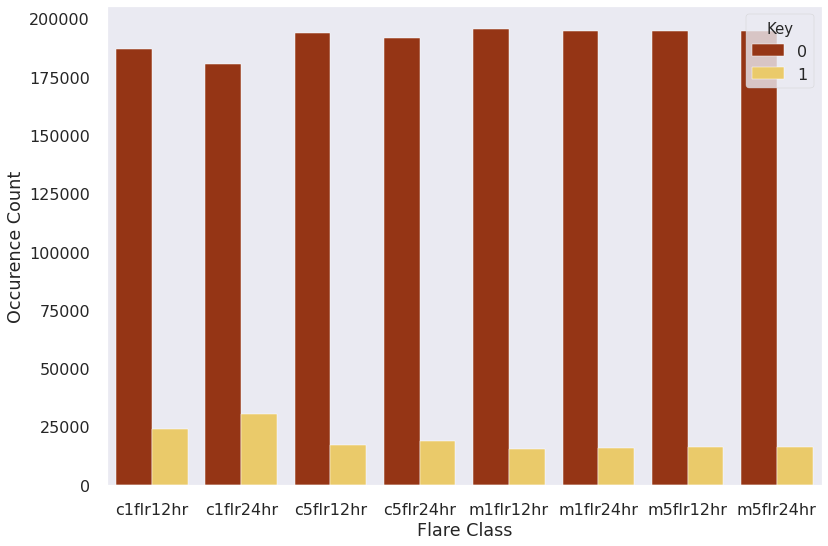

In [202]:
style.use('seaborn-poster')
sns.barplot(x='Flare Class', y='Occurence Count', hue='Key', data=tidy, palette=("afmhot"))
# Should I also find Flare Class exclusive plots?

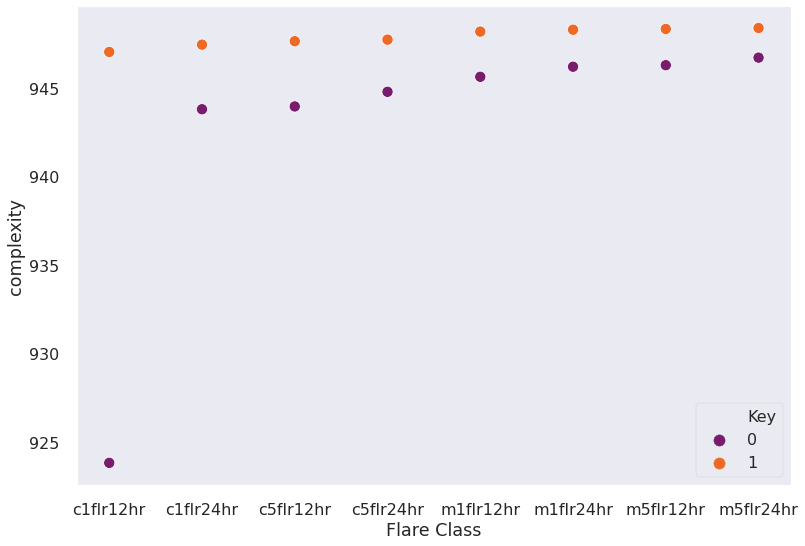

In [223]:
style.use('seaborn-poster')
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.scatterplot(x='Flare Class', y=labels.complexity, hue='Key', palette='inferno',
                data=tidy)

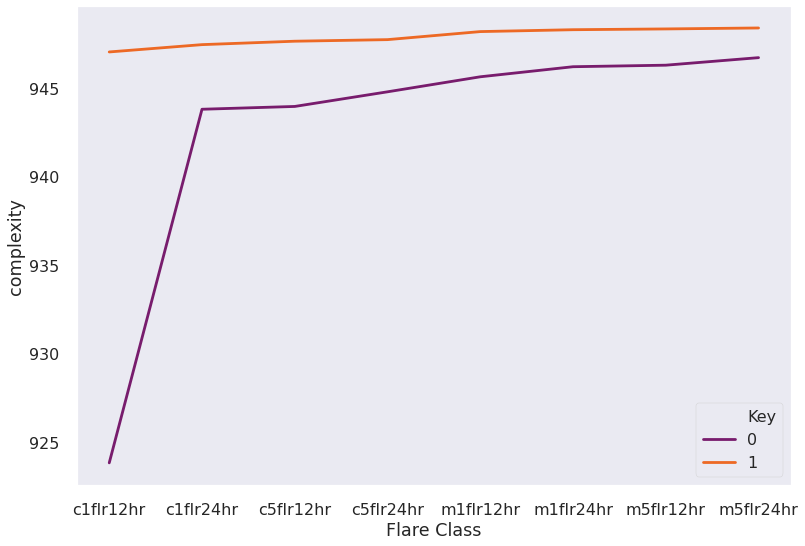

In [233]:
style.use('seaborn-poster')
sns.lineplot(x='Flare Class', y=labels.complexity, hue='Key', palette='inferno',
                data=tidy)

***

### lookup_properties.csv

| header        | description                                                                                   |
| ---           | ---                                                                                           |
| area          | SMART detection property.                                                                     |
| areafrac      | SMART detection property.                                                                     |
| areathesh     | SMART detection property.                                                                     |
| arid          | SMART detection property.                                                                     |
| bipolesep     | SMART detection property.                                                                     |
| bmax          | SMART detection property.                                                                     |
| deg2dc        | SMART detection property.                                                                     |
| detstatus     | SMART detection property.                                                                     |
| flux          | SMART detection property.                                                                     |
| fluxfrac      | SMART detection property.                                                                     |
| magstatus     | SMART detection property.                                                                     |
| npsl          | SMART detection property.                                                                     |
| posstatus     | SMART detection property.                                                                     |
| pslcurvature  | SMART detection property.                                                                     |
| psllength     | SMART detection property.                                                                     |
| pxscl_hpc2stg | SMART detection property.                                                                     |
| rvalue        | SMART detection property.                                                                     |
| sszstatus     | SMART detection property.                                                                     |
| wlsg          | SMART detection property.                                                                     |
| hcpos_x       | heliocentric longitude of the active region's centre.                                         |
| hcpos_y       | heliocentric latitude of the of the active region's centre.                                   |
| pxpos_x       | pixel position of the active region's centre along the horizontal axis.                       |
| pxpos_y       | pixel position of the active region's centre along the vertical axis.                         |


In [12]:
smart_columns = ['area', 'areafrac', 'arid', 'bipolesep', 'bmax', 'deg2dc',
                 'detstatus', 'flux', 'fluxfrac', 'magstatus', 'npsl',
                 'posstatus', 'pslcurvature', 'psllength', 'pxscl_hpc2stg', 
                 'rvalue', 'sszstatus', 'wlsg', 'complexity']

# The relationship between the coordinates of the center and the complexity can be explored.

In [13]:
smart_data = data[smart_columns]

In [14]:
smart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210692 entries, 0 to 210691
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   area           210692 non-null  float64
 1   areafrac       210692 non-null  float64
 2   arid           210692 non-null  int64  
 3   bipolesep      210692 non-null  float64
 4   bmax           210692 non-null  float64
 5   deg2dc         210692 non-null  float64
 6   detstatus      210692 non-null  int64  
 7   flux           210692 non-null  float64
 8   fluxfrac       210692 non-null  float64
 9   magstatus      210692 non-null  int64  
 10  npsl           210692 non-null  int64  
 11  posstatus      210692 non-null  int64  
 12  pslcurvature   210692 non-null  float64
 13  psllength      210692 non-null  float64
 14  pxscl_hpc2stg  210692 non-null  float64
 15  rvalue         210692 non-null  float64
 16  sszstatus      210692 non-null  int64  
 17  wlsg           210692 non-nul

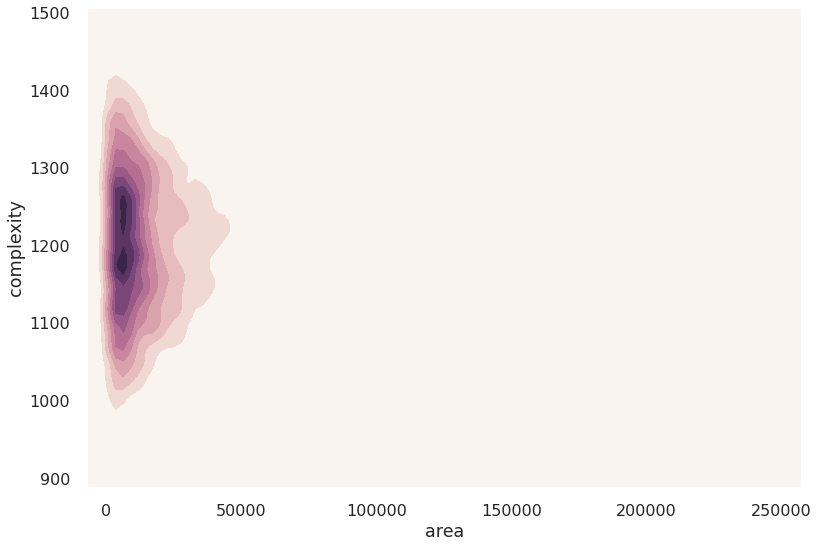

In [256]:
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.kdeplot(data=smart_data.area, data2=smart_data.complexity , cmap=cmap, shade=True)

(31.13, 250290.0)

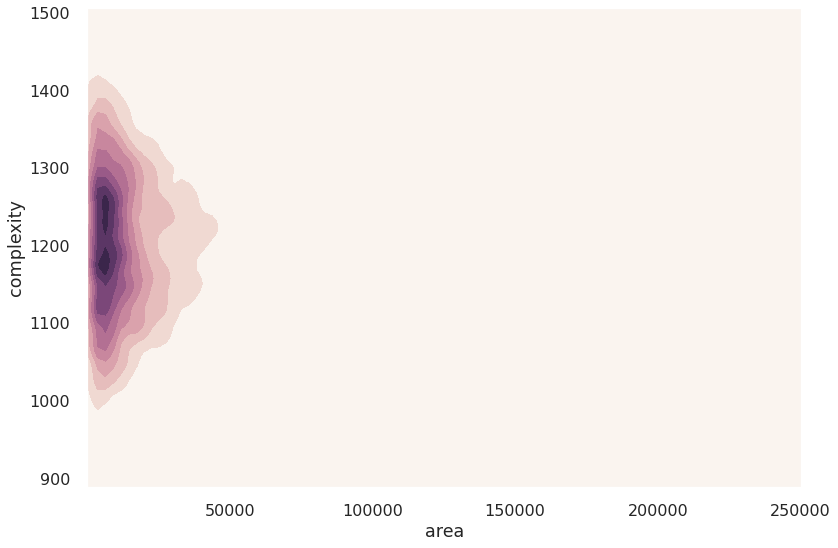

In [279]:
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
plt.xlim(smart_data.area.min(), smart_data.area.max())
sns.kdeplot(data=smart_data.area, data2=smart_data.complexity , cmap=cmap, shade=True)
plt.xlim(smart_data.area.min(), smart_data.area.max())

# Univariate plots of SMART properties
Would help in feature selection and engineering

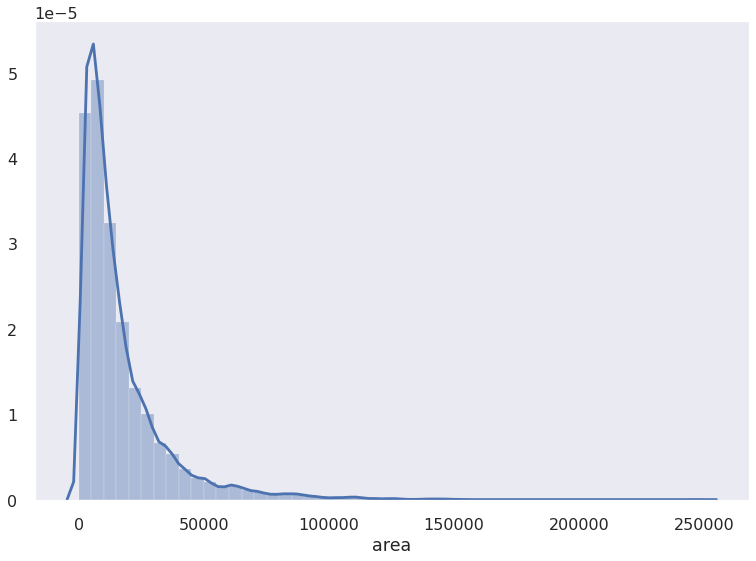

In [293]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[0]])

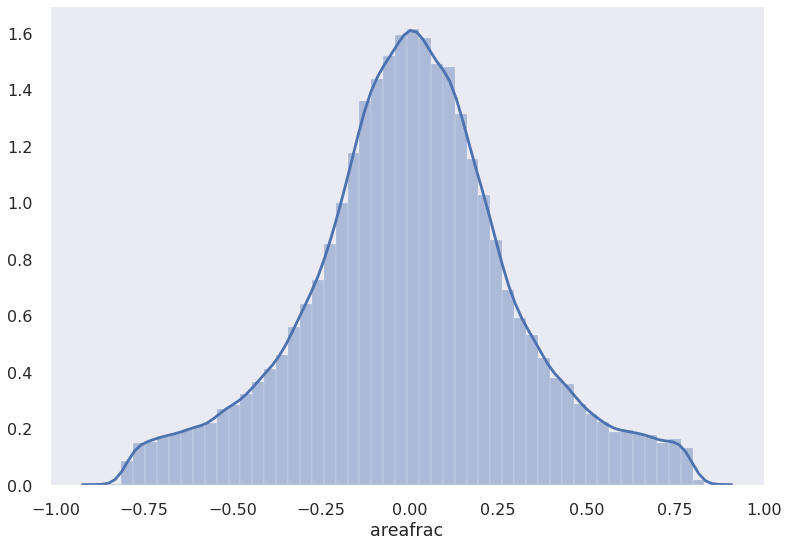

In [292]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[1]])

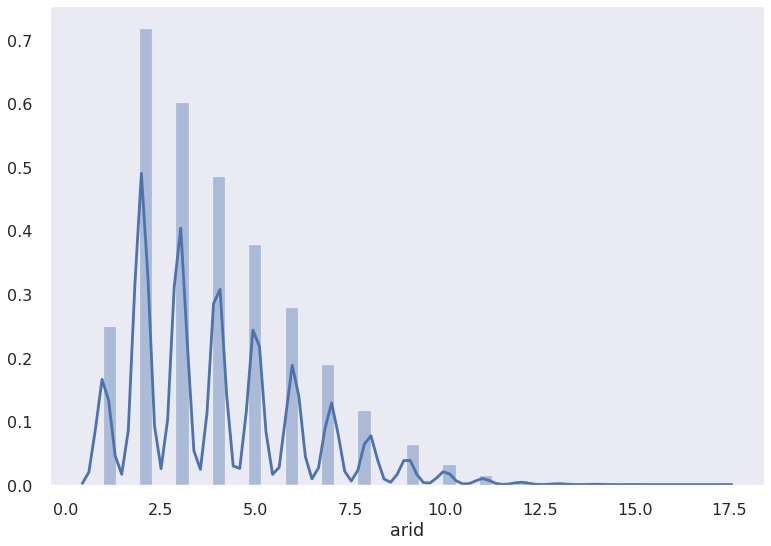

In [291]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[2]])

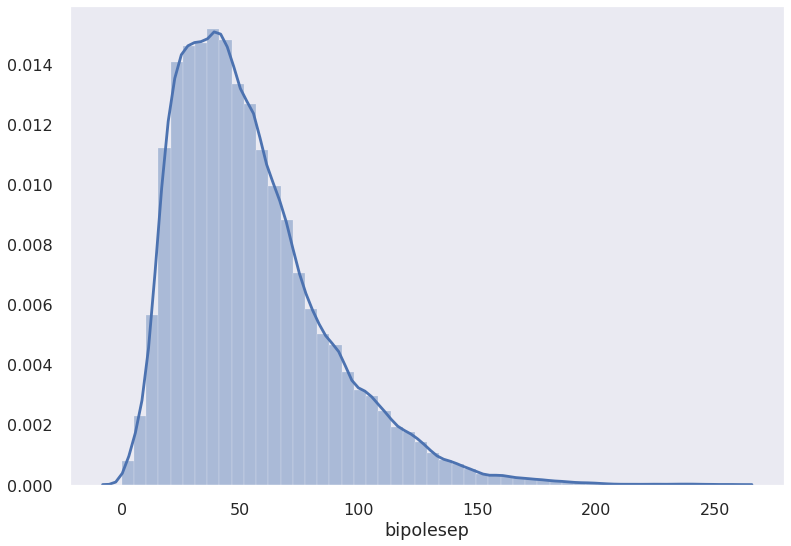

In [294]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[3]])

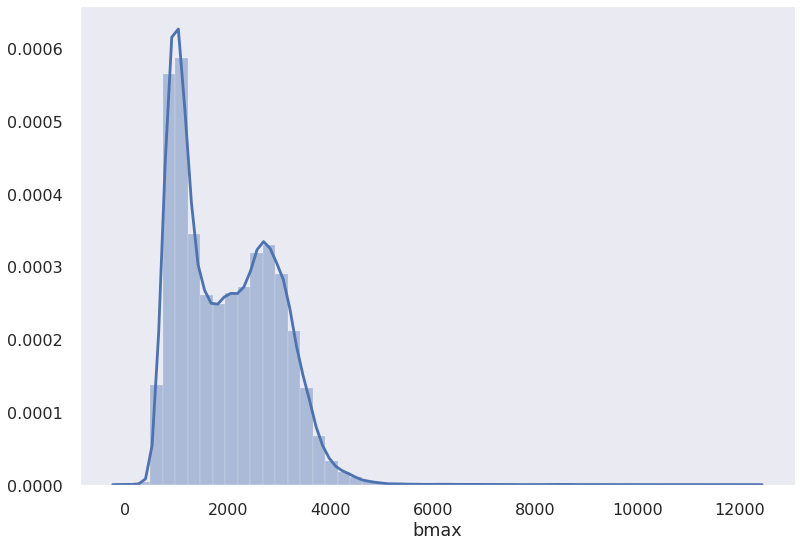

In [295]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[4]])

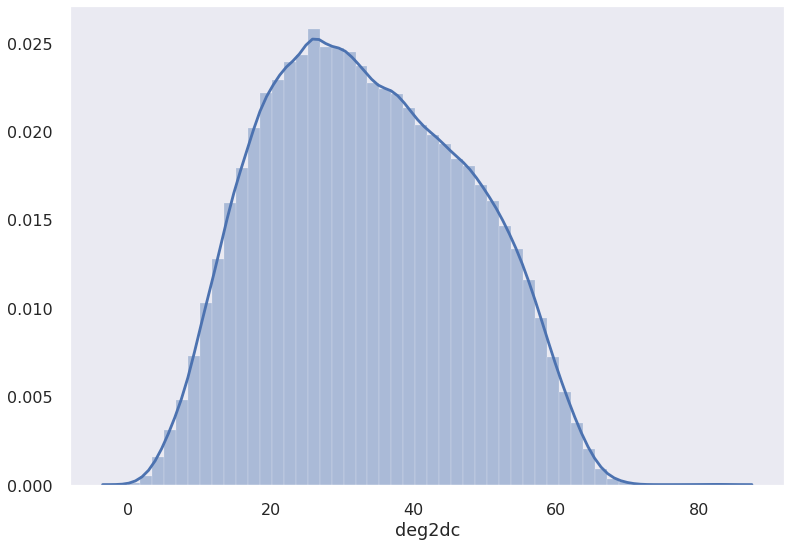

In [296]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[5]])

/home/apollo/anaconda3/envs/Andromeda/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


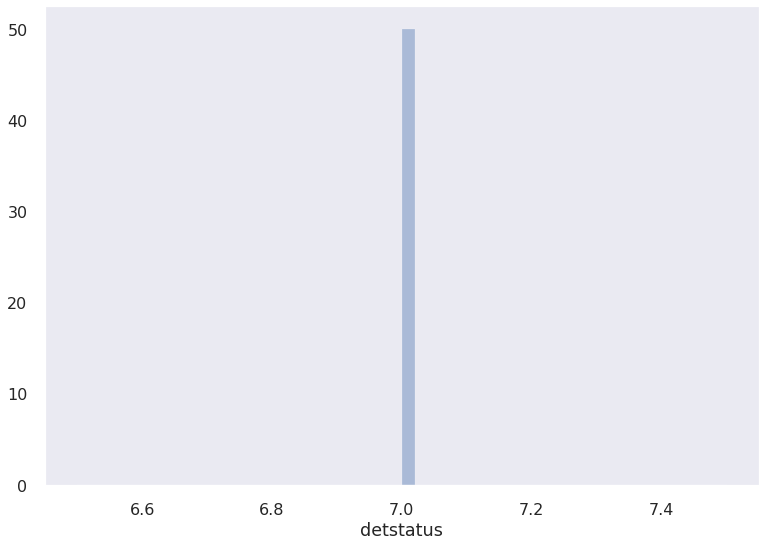

In [297]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[6]])

In [16]:
smart_data.flux.describe()

count    2.106920e+05
mean     2.318185e+22
std      2.940573e+22
min      0.000000e+00
25%      5.219700e+21
50%      1.247750e+22
75%      2.883025e+22
max      3.076000e+23
Name: flux, dtype: float64

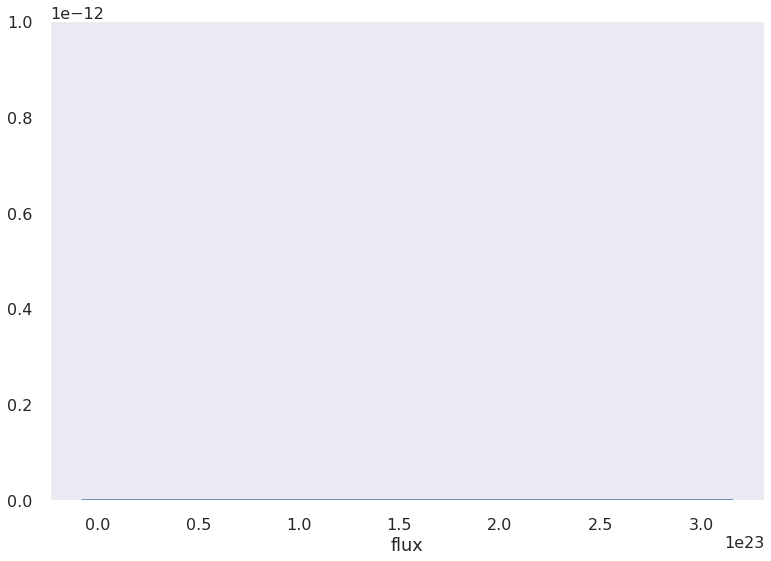

In [298]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[7]])

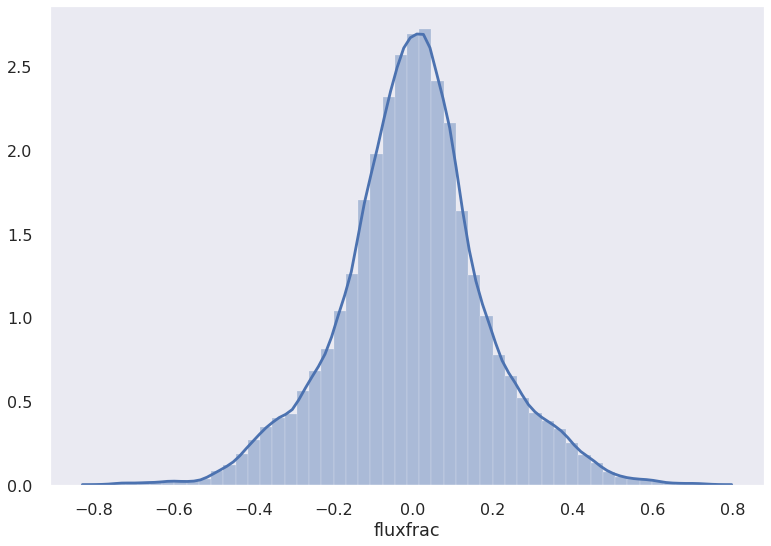

In [299]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[8]])

/home/apollo/anaconda3/envs/Andromeda/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


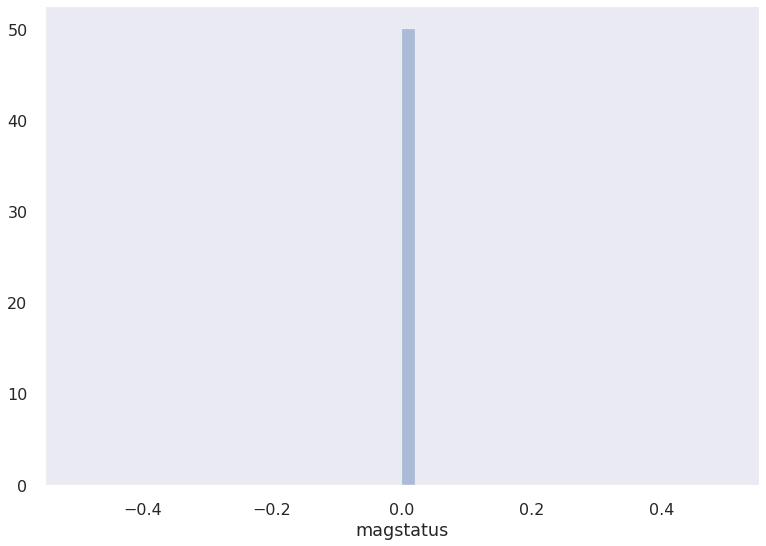

In [300]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[9]])

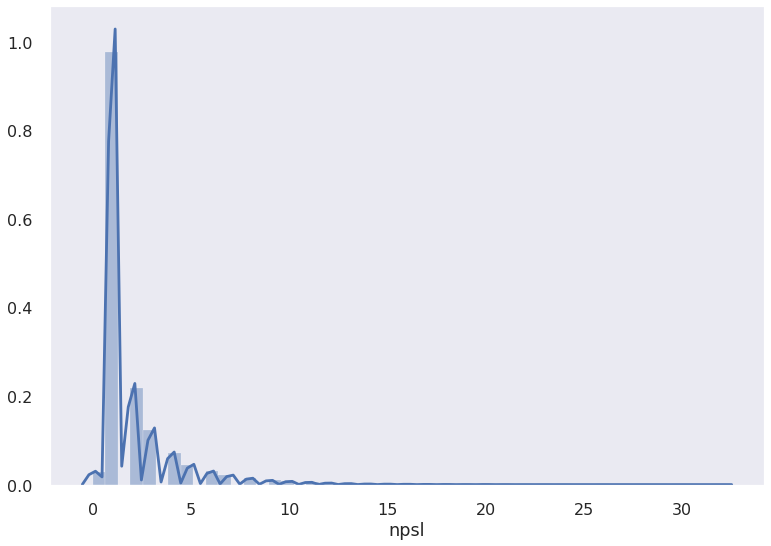

In [301]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[10]])

In [18]:
smart_data[smart_columns[11]][smart_data[smart_columns[11]] < 7].count()

4

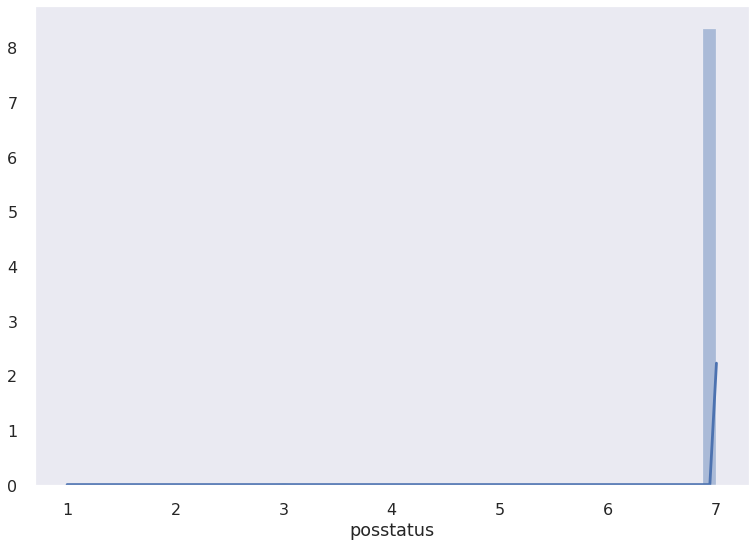

In [303]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[11]])

In [20]:
smart_data[smart_columns[12]].describe()

count    210692.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: pslcurvature, dtype: float64

/home/apollo/anaconda3/envs/Andromeda/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


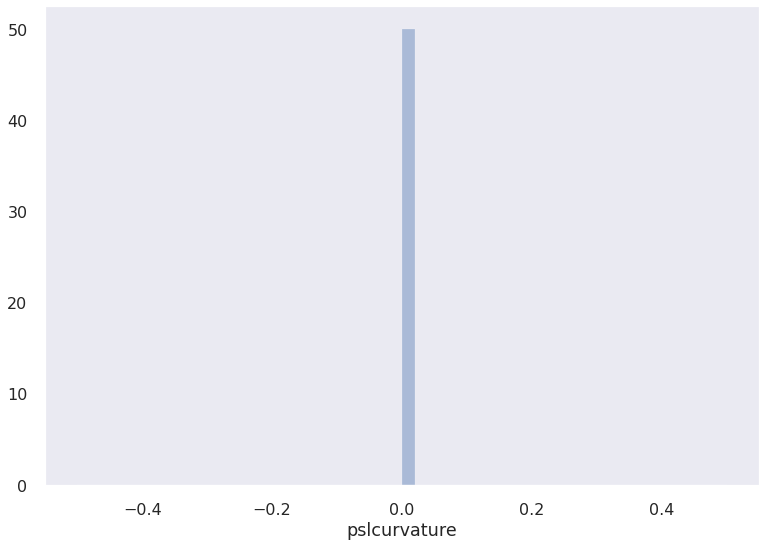

In [305]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[12]])

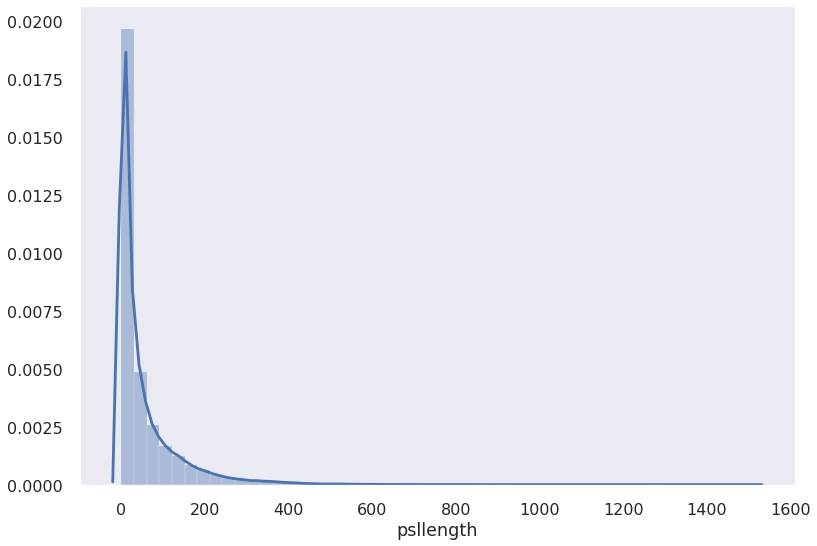

In [306]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[13]])

/home/apollo/anaconda3/envs/Andromeda/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


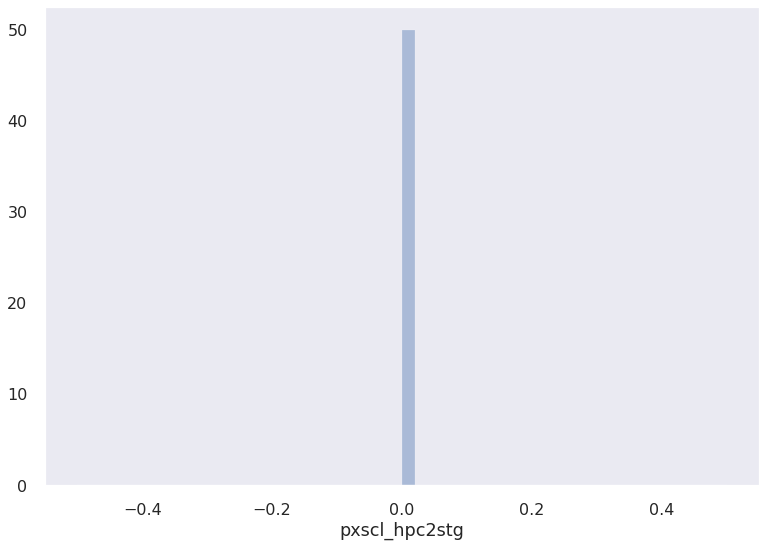

In [307]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[14]])

In [21]:
smart_data[smart_columns[15]].describe()

count    2.106920e+05
mean     5.598563e+04
std      4.915212e+05
min      0.000000e+00
25%      6.335000e+03
50%      1.497700e+04
75%      4.079525e+04
max      5.345700e+07
Name: rvalue, dtype: float64

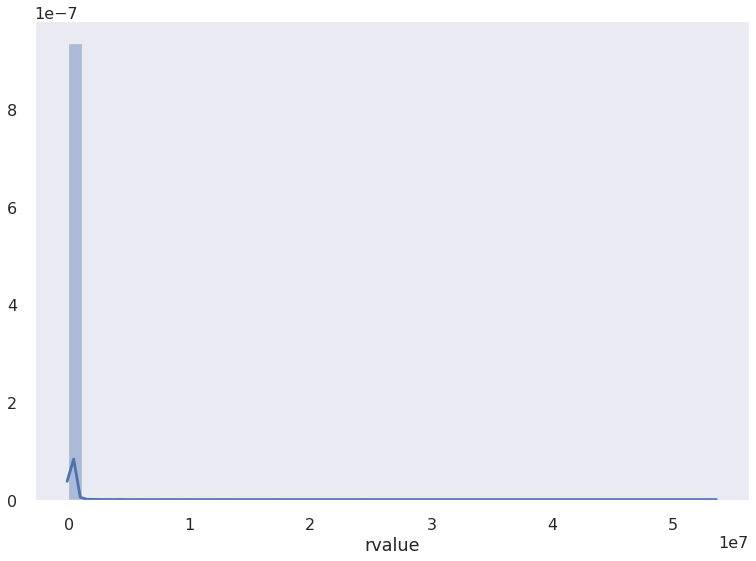

In [308]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[15]])

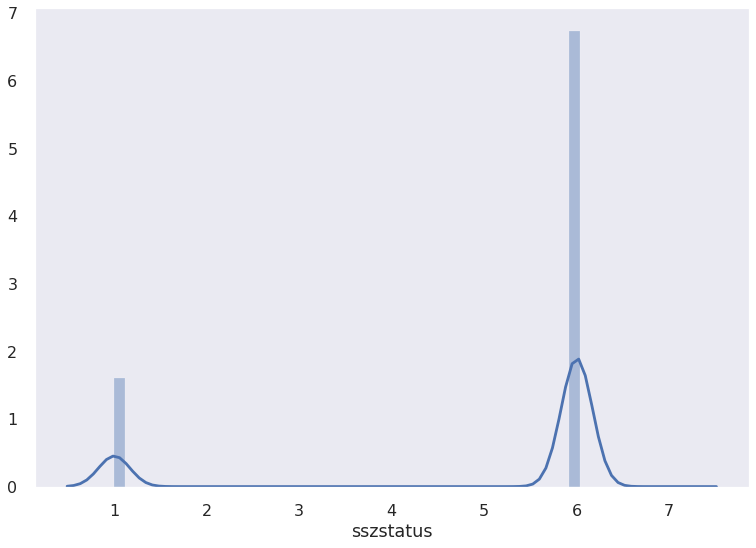

In [309]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[16]])

In [22]:
smart_data[smart_columns[17]].describe()

count    2.106920e+05
mean     3.577692e+04
std      6.772364e+04
min      0.000000e+00
25%      1.682800e+03
50%      9.515000e+03
75%      4.019700e+04
max      2.558000e+06
Name: wlsg, dtype: float64

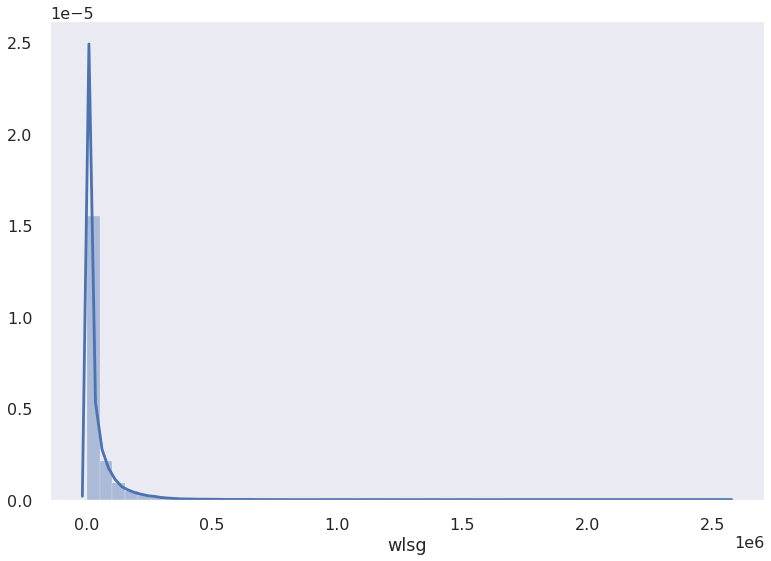

In [310]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[17]])

# Complexity
Nice Gaussian :)

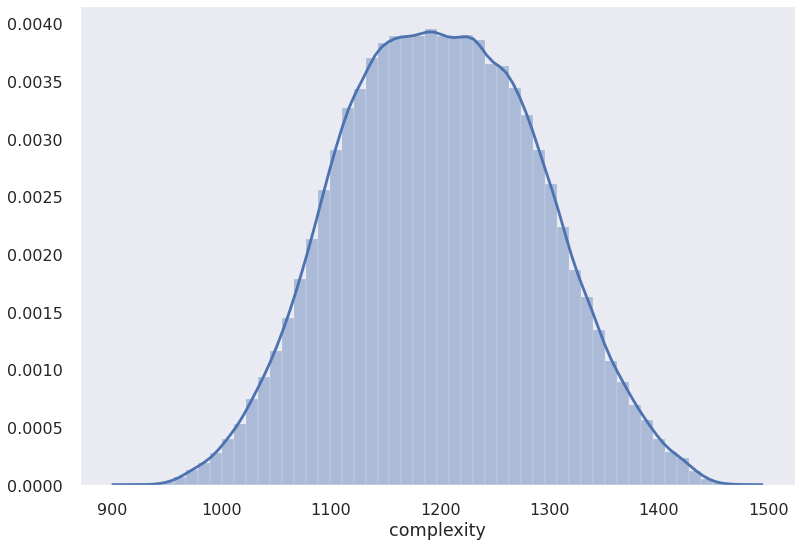

In [311]:
style.use('seaborn-poster')
sns.distplot(smart_data[smart_columns[18]])

In [25]:
user = pd.read_csv('/home/apollo/Desktop/SolarWeather/users_links.csv', delimiter=';')